<a href="https://colab.research.google.com/github/nikunjchapadia/fastbook/blob/master/pet_breeds_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.1 MB/s 
     |████████████████████████████████| 189 kB 50.7 MB/s 
     |████████████████████████████████| 46 kB 3.5 MB/s 
     |████████████████████████████████| 1.2 MB 39.3 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 51 kB 250 kB/s 
Mounted at /content/gdrive


In [5]:
from fastai.vision.all import *
from fastbook import *

In [6]:
path = untar_data(URLs.PETS)
path

Path('/root/.fastai/data/oxford-iiit-pet')

In [7]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [8]:
Path.BASE_PATH = path

In [9]:
path.ls()

(#2) [Path('images'),Path('annotations')]

In [10]:
(path/'images').ls()

(#7393) [Path('images/great_pyrenees_81.jpg'),Path('images/basset_hound_146.jpg'),Path('images/yorkshire_terrier_57.jpg'),Path('images/american_pit_bull_terrier_194.jpg'),Path('images/yorkshire_terrier_68.jpg'),Path('images/newfoundland_136.jpg'),Path('images/basset_hound_171.jpg'),Path('images/japanese_chin_34.jpg'),Path('images/pomeranian_45.jpg'),Path('images/Bengal_39.jpg')...]

In [11]:
fname = (path/'images').ls()[0]

In [12]:
# great_pyrenees this is bread before _n 
re.findall(r'(.+)_\d+.jpg$', fname.name)

['great_pyrenees']

In [13]:
using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name')

functools.partial(<function _using_attr at 0x7f97967490e0>, <fastai.data.transforms.RegexLabeller object at 0x7f9781528250>, 'name')

In [14]:
pets = DataBlock(
    # independennt variable, dependent variable 
    blocks = (ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42),
    get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
    # presizing 
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)

In [15]:
dls = pets.dataloaders(path/'images')

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


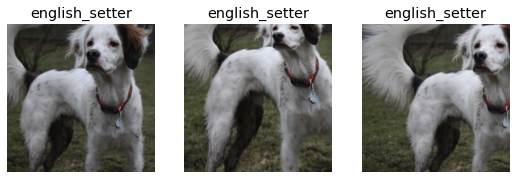

In [16]:
dls.show_batch(nrows=1, ncols=3, unique=True)

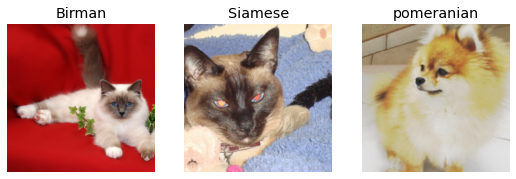

In [17]:
dls.show_batch(nrows=1, ncols=3)

In [18]:
# without resizig 
pets1 = DataBlock(
    # independennt variable, dependent variable 
    blocks = (ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42),
    get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name')
    )
# pets1.summary(path/'images')

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/english_setter_117.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x333
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/english_setter_117.jpg
    applying partial gives
      english_setter
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(19)

Final sample: (PILImage mode=RGB size=500x333, TensorCategory(19))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting

RuntimeError: ignored

In [19]:
learn = cnn_learner(dls,resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.526464,0.345458,0.120433,42:15


epoch,train_loss,valid_loss,error_rate,time
0,0.533529,0.332197,0.106225,59:27
1,0.334272,0.214951,0.069012,56:44


In [25]:
# check which loss function we are using, fastai selectes 
learn.loss_func
# cross entropy loss
# its loss function same as loss function with two benefits
# 1. it worked even when our dependent variables has more than two categories
# 2. it results in faster and more raliable training 

# softmax is the first part 
# log likeklihood is second

FlattenedLoss of CrossEntropyLoss()

In [26]:
# viewing activations and labels 
x,y = dls.one_batch()

In [27]:
y

TensorCategory([ 7, 18,  3, 31,  4, 22, 20, 21, 18, 15, 29, 23,  9, 10, 11, 22, 19, 10, 16, 33,  0, 32,  8, 10, 30,  1,  2, 13, 31,  4, 23, 31, 28,  1, 26, 25, 16,  5, 12,  5, 35, 31, 28,  9, 28, 15, 20, 18,
        10,  8,  5, 20, 25, 10,  2, 14, 29,  0, 15, 17, 34, 34, 18, 34])

In [28]:
dls.vocab

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']

In [29]:
dls.vocab[7]

'Persian'

In [30]:
# dl=[(x,y)] dataloaders with mini batch
preds, _ = learn.get_preds(dl=[(x,y)])
preds[0]

TensorBase([9.3081e-07, 3.0239e-07, 1.7567e-04, 1.9349e-06, 8.2040e-06, 7.6385e-08, 3.6906e-02, 9.3341e-01, 2.9401e-02, 7.4449e-09, 3.0118e-09, 1.1347e-06, 2.8268e-07, 9.5499e-08, 3.0956e-07, 2.1118e-07,
        1.1491e-07, 2.8771e-08, 5.5460e-08, 3.6620e-08, 1.2355e-07, 1.7926e-06, 5.3381e-06, 6.5153e-05, 1.4216e-07, 1.1435e-06, 7.2806e-09, 1.8264e-07, 1.5869e-05, 6.5804e-08, 7.0634e-07, 6.2327e-07,
        6.6194e-08, 1.2105e-08, 2.7260e-09, 3.7673e-07, 3.3005e-07])

In [31]:
# the actual preedictions are 37 probabilities bwetween 0 and 1 
# which will add up to 1 in total 
len(preds[0]), preds[0].sum()

(37, TensorBase(1.0000))

/usr/local/lib/python3.7/dist-packages/fastbook/__init__.py:74: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  ../aten/src/ATen/native/RangeFactories.cpp:23.)
  x = torch.linspace(min,max)


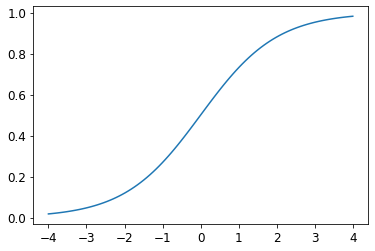

In [32]:
# how can we create predictions so all this preds is bweteen 0 and 1

# to transform the activations of out model into predictionns like this 
# we need to use softmax activation function 


# softmax is extension of sigmoid which handles more than 2 levels/categoreis  
#sigmoid
plot_function(torch.sigmoid, min=-4, max=4)

In [ ]:
# above is for two, we want it for 37 pet breeds 
# we need one activation per breed means 37 activations 

In [33]:
# learn softmax

# lets consider before we had two category 3 and 7 digit 
torch.random.manual_seed(42)
acts = torch.randn((6,2))*2
acts

tensor([[ 0.6734,  0.2576],
        [ 0.4689,  0.4607],
        [-2.2457, -0.3727],
        [ 4.4164, -1.2760],
        [ 0.9233,  0.5347],
        [ 1.0698,  1.6187]])

In [34]:
acts.sigmoid()

tensor([[0.6623, 0.5641],
        [0.6151, 0.6132],
        [0.0957, 0.4079],
        [0.9881, 0.2182],
        [0.7157, 0.6306],
        [0.7446, 0.8346]])

In [35]:
# this doesnt add up to 1
# we could take the diff of both value 
diff = acts[:,0]-acts[:,1]
diff

tensor([ 0.4158,  0.0083, -1.8731,  5.6924,  0.3886, -0.5489])

In [36]:
# now take sigmoid of this diff
diff.sigmoid()

tensor([0.6025, 0.5021, 0.1332, 0.9966, 0.5959, 0.3661])

In [37]:
torch.stack([diff.sigmoid(), 1-diff.sigmoid()],dim=1)

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [38]:
# exp - exponential fuction e**x
# e is special number 2.718 
# it is inverse of nnatural algorithm function 
# exp is always positve and increase very rapidly 
def softmax(x): 
  return exp(x) / exp(x).sum(dim=1, keepdim=true)

In [39]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts 

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [42]:
# log 
targ = tensor([0,1,0,1,1,0])

In [43]:
# we cant use where because we have more than 2 activation
idx = range(6)
sm_acts[idx, targ]

tensor([0.6025, 0.4979, 0.1332, 0.0034, 0.4041, 0.3661])

In [45]:
from IPython.display import HTML

df = pd.DataFrame(sm_acts, columns=['3','7'])
df['targ'] = targ
df['idx'] = idx
df['loss'] = sm_acts[range(6), targ]
t = df.style.hide_index()

#To have html code compatible with our script
html = t._repr_html_().split('</style>')[1]
html = re.sub(r'<table id="([^"]+)"\s*>', r'<table >', html)
display(HTML(html))

3,7,targ,idx,loss
0.602469,0.397531,0,0,0.602469
0.502065,0.497935,1,1,0.497935
0.133188,0.866811,0,2,0.133188
0.996640,0.003360,1,3,0.003360
0.595949,0.404051,1,4,0.404051
0.366118,0.633882,0,5,0.366118


In [46]:
-sm_acts[idx, targ]

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

In [49]:
# NLL - negative log likelihood
F.nll_loss(sm_acts, targ, reduction='none')

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

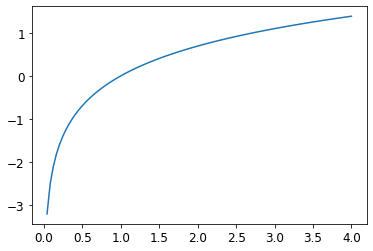

In [48]:
# LOG
# proabilities cant be smaller than zero or greater than one 
# that means our model will not care about whether it predicts 0.99 vs 0.999 
# becasue those numbers are so close together 
# 0.999 is 10 times more confident than 0.99
# transform number between 0 and 1 instead betwee -infinity to infinity 
# log function does this 
# it is not defined for numbers less than 0 

# y = b**a
# a = log(y,b)

# log(a*b) = log(a) + log(b)
plot_function(torch.log, min=0, max=4)

In [52]:
torch.log(tensor(1.))

tensor(0.)

In [55]:
loss_func = nn.CrossEntropyLoss()

In [56]:
loss_func(acts, targ)

tensor(1.8045)

In [58]:
F.cross_entropy(acts, targ)

tensor(1.8045)

In [60]:
# reduction - pt loss fuction take the mean of the loss of all the items
# reduction - none disabled it
nn.CrossEntropyLoss(reduction='none')(acts, targ)


tensor([0.5067, 0.6973, 2.0160, 5.6958, 0.9062, 1.0048])

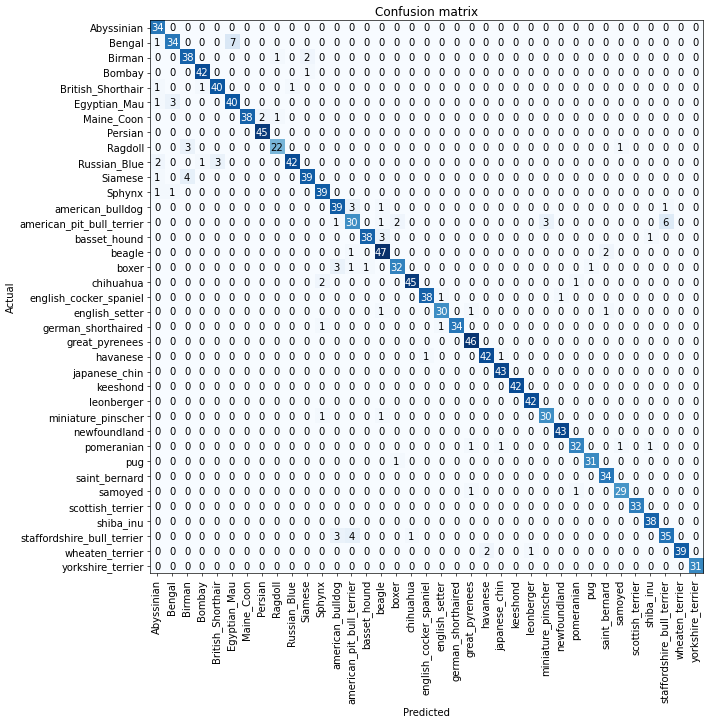

In [61]:
from IPython.core.pylabtools import figsize
# model interpretation
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60 )

In [62]:
interp.most_confused(min_val=5)

[('Bengal', 'Egyptian_Mau', 7),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6)]

In [63]:
# imporve model
# how ? by improving learning rate 
# why lr make difference? train it faster , so its use less resources

learn = cnn_learner(dls,resnet34, metrics=error_rate)
# fine tune with higher learning rate  (last time we used 0.002)
learn.fine_tune(1, base_lr=0.1)

epoch,train_loss,valid_loss,error_rate,time
0,2.444712,4.345605,0.439107,43:54


epoch,train_loss,valid_loss,error_rate,time
0,3.962927,2.581523,0.692152,55:42


ValueError: ignored

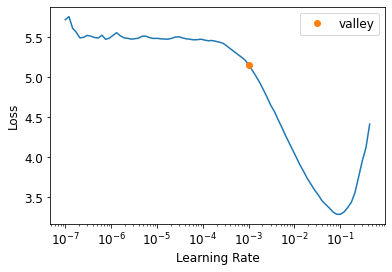

In [64]:
# above learning rate will produce bad results 
# we have too high learning rate

# How can we find the perfect learning rate?
# Learning rate finder (log scale)
learn = cnn_learner(dls,resnet34, metrics=error_rate)


In [67]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

NameError: ignored

SuggestedLRs(valley=0.0012022644514217973)

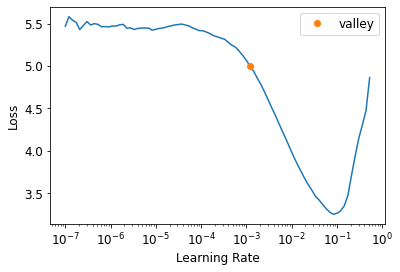

In [73]:
learn.lr_find()

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)

In [74]:
# transfer learnning 
learn.fine_tune??

In [75]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3,3e-3) 

epoch,train_loss,valid_loss,error_rate,time
0,1.145311,0.316279,0.104871,39:17
1,0.544186,0.257151,0.085927,39:30
2,0.329043,0.228808,0.077131,39:32


In [76]:
# unfreeze the model 
learn.unfreeze()

SuggestedLRs(valley=1.4454397387453355e-05)

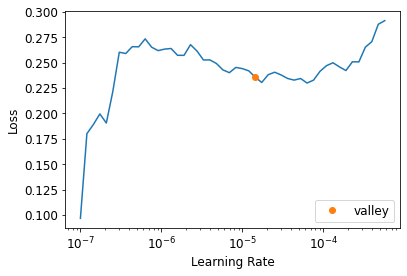

In [77]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.260869,0.215605,0.075778,55:43


In [1]:
# discriminative learning rate
# diff layers needs to be trained at differet rate 

learn = cnn_learner(dls,resnet34, metrics=error_rate)
learn.fit_one_cyecle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12,lr_max=slice(1e-6,1e-4))

NameError: ignored

In [ ]:
learn.recorder.plot_loss()

In [ ]:
# we are still at 5% error rate 
# how can we improve it ? - Deeper Architecture 